Preprocessing data for the input for the Hugginface pretrained models. We convert our images into the dataset, consisting in a dictionary with train, validation and test data.

In [1]:
#Create dataset
import os
import datasets
from datasets import Dataset, DatasetDict, load_dataset, load_from_disk



def create_image_folder_dataset(root_path):
  """creates `Dataset` from image folder structure"""

  # get class names by folders names
  _CLASS_NAMES= os.listdir(root_path)
  # defines `datasets` features`
  features=datasets.Features({
                      "img": datasets.Image(),
                      "label": datasets.features.ClassLabel(names=_CLASS_NAMES),
                  })
  # temp list holding datapoints for creation
  img_data_files=[]
  label_data_files=[]
  # load images into list for creation
  for img_class in os.listdir(root_path):
    for img in os.listdir(os.path.join(root_path,img_class)):
      path_=os.path.join(root_path,img_class,img)
      img_data_files.append(path_)
      label_data_files.append(img_class)
  # create dataset
  ds = datasets.Dataset.from_dict({"img":img_data_files,"label":label_data_files},features=features)
  return ds

/home/studio-lab-user/.conda/envs/PRUEBA/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
ds = create_image_folder_dataset("data")

In [7]:
ds

Dataset({
    features: ['img', 'label'],
    num_rows: 2680
})

In [8]:
ds.features

{'img': Image(decode=True, id=None),
 'label': ClassLabel(num_classes=2, names=['proton', 'gamma'], id=None)}

In [9]:
#Classes names
labels = ds.features["label"].names
print(labels)

['proton', 'gamma']


In [10]:
# test size will be 15% of train dataset and we do stratify to mantain the same percentage of classes in train and test
#because we have a very imbalanced dataset
from sklearn.model_selection import train_test_split
test_size=.15

train_ds, test_ds = train_test_split(ds, test_size=test_size, stratify=ds['label'])

In [11]:
train_ds = Dataset.from_dict(train_ds, features = datasets.Features({
                      "img": datasets.Image(),
                      "label": datasets.features.ClassLabel(names=labels),
                  }))
test_ds = Dataset.from_dict(test_ds, features = datasets.Features({
                      "img": datasets.Image(),
                      "label": datasets.features.ClassLabel(names=labels),
                  }))

In [12]:
train_ds

Dataset({
    features: ['img', 'label'],
    num_rows: 2278
})

In [13]:
train_ds.features

{'img': Image(decode=True, id=None),
 'label': ClassLabel(num_classes=2, names=['proton', 'gamma'], id=None)}

In [14]:
test_ds

Dataset({
    features: ['img', 'label'],
    num_rows: 402
})

(array([1662.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         616.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

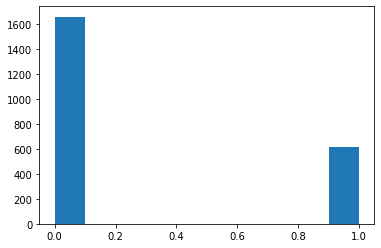

In [15]:
#To check if we have the same percentage in train and test
import matplotlib.pyplot as plt
plt.hist(train_ds['label'])

(array([293.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 109.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

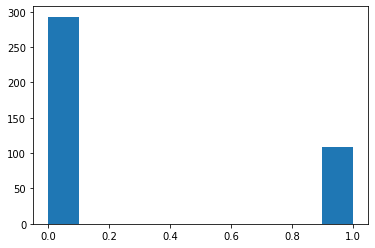

In [16]:
plt.hist(test_ds['label'])

In [17]:
#We have the same, so it worked.

In [18]:
train_ds[0]

{'img': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=288x288>,
 'label': 0}

We take a look at an example. The image field contains a PIL image and each label is an integer that represents a class. We create a dictionary that maps a label name to an integer and vice versa. The mapping will help the model recover the label name from the label number.

In [19]:
label2id, id2label = dict(), dict()
for i, label in enumerate(labels):
    label2id[label] = str(i)
    id2label[str(i)] = label

Now we can covert the label number to a label name.

In [20]:
id2label[str(0)]

'proton'

In [21]:
id2label[str(1)]

'gamma'

In [23]:
# split up training into training + validation
test_size=.1

train_ds, val_ds = train_test_split(train_ds, test_size=test_size, stratify=train_ds['label'])

In [24]:
train_ds = Dataset.from_dict(train_ds, features = datasets.Features({
                      "img": datasets.Image(),
                      "label": datasets.features.ClassLabel(names=labels),
                  }))
val_ds = Dataset.from_dict(val_ds, features = datasets.Features({
                      "img": datasets.Image(),
                      "label": datasets.features.ClassLabel(names=labels),
                  }))

In [25]:
train_ds

Dataset({
    features: ['img', 'label'],
    num_rows: 2050
})

In [26]:
val_ds

Dataset({
    features: ['img', 'label'],
    num_rows: 228
})

In [27]:
test_ds 

Dataset({
    features: ['img', 'label'],
    num_rows: 402
})

(array([1496.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         554.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

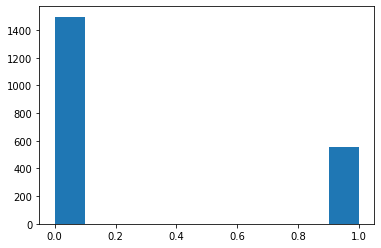

In [28]:
plt.hist(train_ds['label'])

(array([166.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  62.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

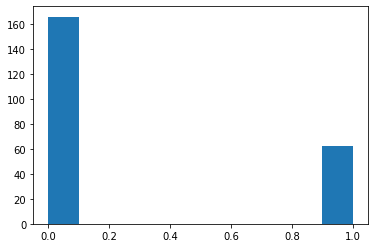

In [29]:
plt.hist(val_ds['label'])

(array([293.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 109.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

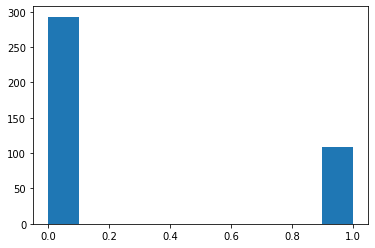

In [30]:
plt.hist(test_ds['label'])

In [31]:
#All together to save it
ds_dict = datasets.DatasetDict({
    "train": train_ds,
    "val": val_ds,
    "test": test_ds,
})


In [32]:
ds_dict

DatasetDict({
    train: Dataset({
        features: ['img', 'label'],
        num_rows: 2050
    })
    val: Dataset({
        features: ['img', 'label'],
        num_rows: 228
    })
    test: Dataset({
        features: ['img', 'label'],
        num_rows: 402
    })
})

In [33]:
#Save data
ds_dict.save_to_disk("./data_dict_cut")

In [34]:
#To load data
ds = load_from_disk('./data_dict_cut')
ds

DatasetDict({
    train: Dataset({
        features: ['img', 'label'],
        num_rows: 2050
    })
    val: Dataset({
        features: ['img', 'label'],
        num_rows: 228
    })
    test: Dataset({
        features: ['img', 'label'],
        num_rows: 402
    })
})